# Image histogram

An image is typically made up of a large number of pixels; Nowadays, cell phones take photographs with spatial resolution that produces a few million pixels. One of the most efficient characterizations or "signatures" of an image is its histogram.

In [1]:
import numpy as np
import matplotlib.image as mpimg
 
f = mpimg.imread('../figures/cameraman.tif')  
print(f.min(), f.max())

0 251


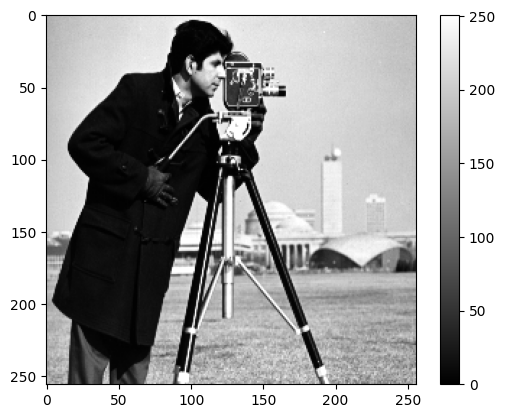

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(f, cmap = 'gray')
plt.colorbar()

In [3]:
nbins = 20
h, bin_edges = np.histogram(f, nbins,(0,255))
print('h=\n',h)
print('bins=\n',bin_edges)

h=
 [10618  7040   918   839   797   586   652   536   455   574  1069  1634
  2569  3927  5319  8057 10160  6244  2263  1279]
bins=
 [  0.    12.75  25.5   38.25  51.    63.75  76.5   89.25 102.   114.75
 127.5  140.25 153.   165.75 178.5  191.25 204.   216.75 229.5  242.25
 255.  ]


O que temos no retorno da função *np.histogram* é a contagem do número de pixels com valores em uma determinada faixa. No exemplo acima, a imagem do *cameramen* possui **10618** pixels com valor entre **0** e **12,75**. Podemos visualizar o histograma através da função *plot* do matplotlib.

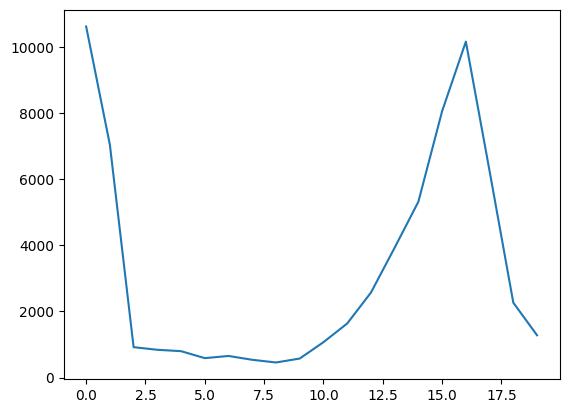

In [4]:
plt.plot(h)

Note that the visualization above is not very suitable, as the histogram is not a continuous function. A better way to visualize the histogram is using a bar chart. And, on the abscissa axis, we want to show the computed gray level value (*bin center*) and not the limits of each range (*bin edges*), as returned by the np.histogram function.

Text(0.5, 1.0, 'Image histogram')

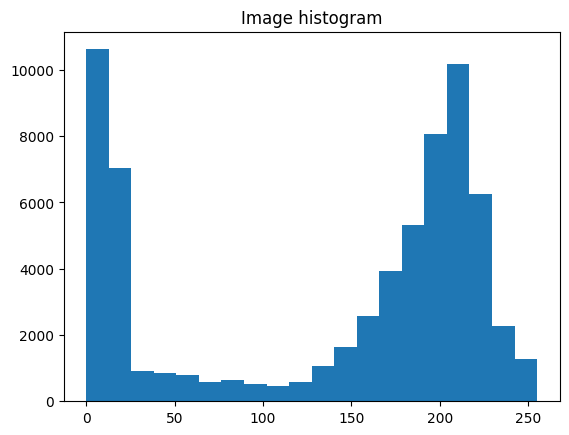

In [5]:
w=255./nbins
bin_centers = bin_edges[1:]-(w/2)
plt.bar(bin_centers, h, width=w)
plt.title('Image histogram')

## Histogram x location information

The histogram contains important image information and is widely used for various processing algorithms, such as thresholding segmentation. However, when computing the number of pixels for each gray level value, the histogram does not take into account the location of the pixels. This can be seen in the example below, where we shuffle the pixels of an image, and the histogram remains the same.

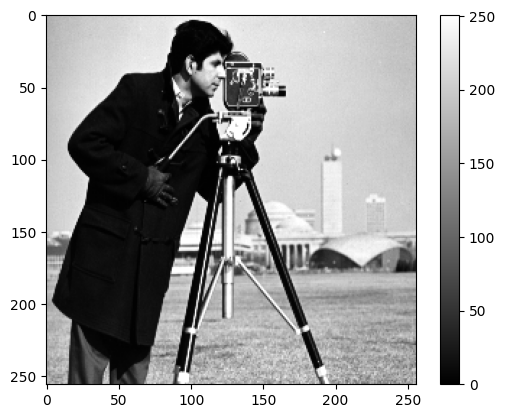

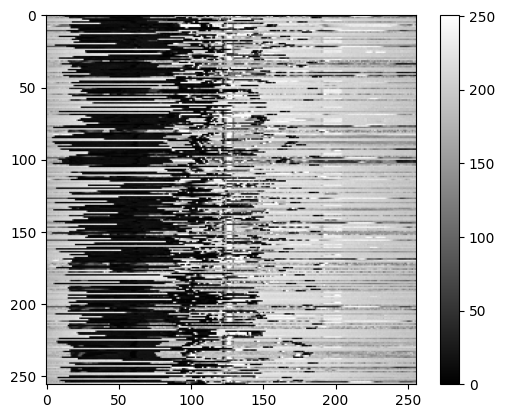

In [6]:
f = mpimg.imread('../figures/cameraman.tif')  

fs = f.copy()
np.random.shuffle(fs) # shuffles the pixels of the image leaving them in another order

plt.figure()
plt.imshow(f, cmap = 'gray')
plt.colorbar()

plt.figure()
plt.imshow(fs, cmap = 'gray')
plt.colorbar()


Text(0.5, 1.0, 'shuffle histogram')

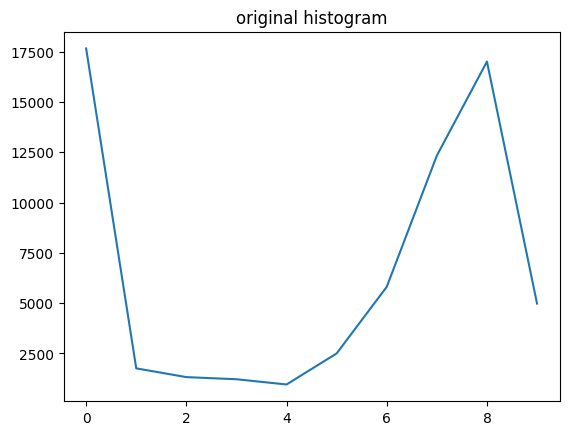

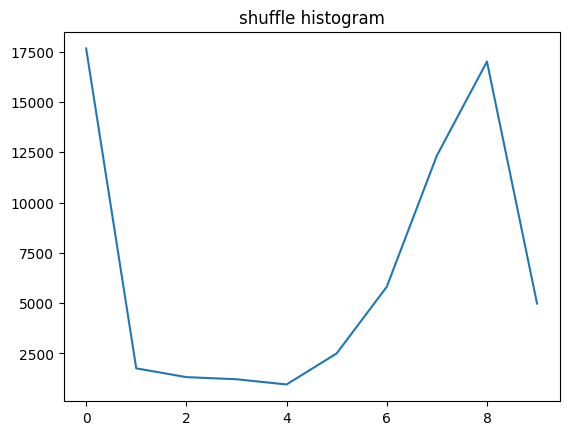

In [7]:
h, bins = np.histogram(f)
plt.figure()
plt.plot(h)
plt.title('original histogram')

hshuffle, binshuffle = np.histogram(fs)
plt.figure()
plt.plot(hshuffle)
plt.title('shuffle histogram')

